# TSFRESH Robot Failure Example

This notebook has 2 goals:

 1. Document a bug in tsfresh on the robot failure dataset
 2. Compare the pandas integrated autocorrelation function with the statsmodels acf and pacf function

In [56]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf

sns.set(font_scale=1.75)
sns.set_style('whitegrid')
sns.set_palette('colorblind')

In [57]:
download_robot_execution_failures()
df, y = load_robot_execution_failures()
df.head()

id  time  F_x  F_y  F_z  T_x  T_y  T_z
0   1     0   -1   -1   63   -3   -1    0
1   1     1    0    0   62   -3   -1    0
2   1     2   -1   -1   61   -3    0    0
3   1     3   -1   -1   63   -2   -1    0
4   1     4   -1   -1   63   -3   -1    0

In [58]:
df

id  time  F_x  F_y   F_z  T_x  T_y  T_z
0      1     0   -1   -1    63   -3   -1    0
1      1     1    0    0    62   -3   -1    0
2      1     2   -1   -1    61   -3    0    0
3      1     3   -1   -1    63   -2   -1    0
4      1     4   -1   -1    63   -3   -1    0
5      1     5   -1   -1    63   -3   -1    0
6      1     6   -1   -1    63   -3    0    0
7      1     7   -1   -1    63   -3   -1    0
8      1     8   -1   -1    63   -3   -1    0
9      1     9   -1   -1    61   -3    0    0
10     1    10   -1   -1    61   -3    0    0
11     1    11   -1   -1    64   -3   -1    0
12     1    12   -1   -1    64   -3   -1    0
13     1    13   -1   -1    60   -3    0    0
14     1    14   -1    0    64   -2   -1    0
15     2     0   -1   -1    63   -2   -1    0
16     2     1   -1   -1    63   -3   -1    0
17     2     2   -1   -1    61   -3    0    0
18     2     3    0   -4    63    1    0    0
19     2     4    0   -1    59   -2    0   -1
20     2     5   -3    3    57   -8   -3   -1
21     2     6   -1    3    70  -10   -2   -1
22     2     7    0   -3    61    0    0    0
23     2     8    0   -2    53   -1   -2    0
24     2     9    0   -3    66    1    4    0
25     2    10   -3    3    58  -10   -5    0
26     2    11   -1   -1    66   -4   -2    0
27     2    12   -1   -2    67   -3   -1    0
28     2    13    0    1    66   -6   -3   -1
29     2    14   -1   -1    59   -3   -4    0
...   ..   ...  ...  ...   ...  ...  ...  ...
1290  87     0  171   86  -486 -113  222   13
1291  87     1  198   96  -566 -125  261   15
1292  87     2  222  112  -667 -136  290   20
1293  87     3  253  126  -780 -142  327   22
1294  87     4  287  142  -930 -138  362   27
1295  87     5  324  158 -1108 -133  389   29
1296  87     6  338  162 -1145 -125  419   32
1297  87     7  340  160 -1104 -124  433   35
1298  87     8  339  158 -1077 -126  437   37
1299  87     9  338  155 -1074 -122  462   39
1300  87    10  336  154 -1051 -127  454   37
1301  87    11  340  151 -1041 -140  458   39
1302  87    12  339  154 -1036 -134  471   42
1303  87    13  342  154 -1036 -118  466   44
1304  87    14  342  154 -1036 -118  466   44
1305  88     0   -6    3    52  -15  -17    3
1306  88     1   -7    2    52  -17  -20    3
1307  88     2   -9    5    46  -21  -22    4
1308  88     3   -8    1    53  -15  -20    5
1309  88     4   -8    2    43  -16  -20    5
1310  88     5   -8    2    46  -17  -22    5
1311  88     6   -8    0    46  -16  -21    5
1312  88     7   -9    2    39  -20  -22    5
1313  88     8  -11    3    42  -22  -27    6
1314  88     9  -10    4    40  -22  -23    5
1315  88    10  -10    2    39  -21  -24    5
1316  88    11  -11    2    38  -24  -22    6
1317  88    12  -12    3    23  -24  -24    5
1318  88    13  -13    4    26  -29  -27    5
1319  88    14  -13    2    15  -25  -25    6

[1320 rows x 8 columns]

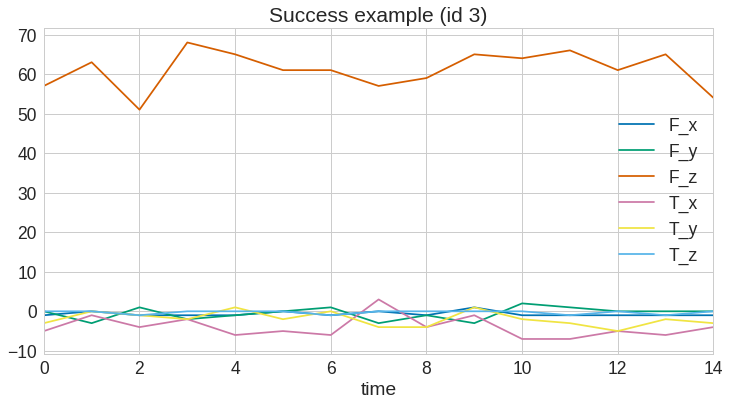

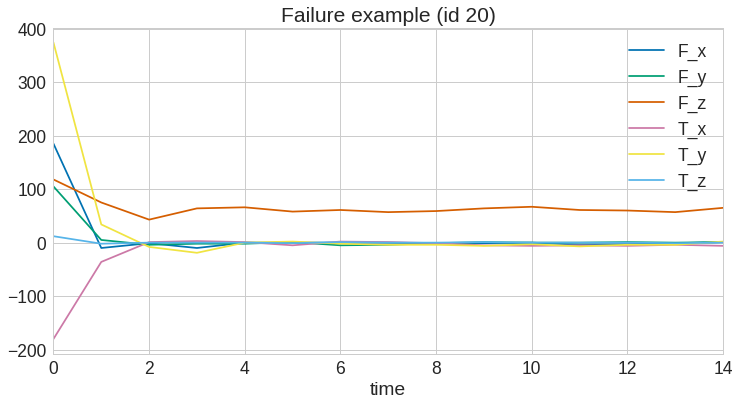

In [59]:
df[df.id == 3][['time', 'F_x', 'F_y', 'F_z', 'T_x', 'T_y', 'T_z']].plot(x='time', title='Success example (id 3)', figsize=(12, 6));
df[df.id == 20][['time', 'F_x', 'F_y', 'F_z', 'T_x', 'T_y', 'T_z']].plot(x='time', title='Failure example (id 20)', figsize=(12, 6));

## Extract Features

In [60]:
extraction_settings = ComprehensiveFCParameters()

In [51]:
X = extract_features(df, 
                     column_id='id', column_sort='time',
                     default_fc_parameters=extraction_settings,
                     impute_function=impute)

Feature Extraction: 100%|██████████| 528/528 [00:11<00:00, 45.18it/s]
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"intercept"'
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"' ...,
 'T_z__fft_coefficient__coeff_9__attr_"imag"'
 'T_z__fft_coefficient__coeff_9__attr_"real"'
 'T_z__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


In [52]:
X.head()

variable  F_x__abs_energy  F_x__absolute_sum_of_changes  \
id                                                        
1                    14.0                           2.0   
2                    25.0                          14.0   
3                    12.0                          10.0   
4                    16.0                          17.0   
5                    17.0                          13.0   

variable  F_x__agg_autocorrelation__f_agg_"mean"  \
id                                                 
1                                      -0.106351   
2                                      -0.039098   
3                                      -0.029815   
4                                      -0.049773   
5                                      -0.061467   

variable  F_x__agg_autocorrelation__f_agg_"median"  \
id                                                   
1                                    -7.206633e-02   
2                                    -4.935275e-02   
3                                     2.602085e-17   
4                                    -6.417112e-02   
5                                    -5.172414e-02   

variable  F_x__agg_autocorrelation__f_agg_"var"  \
id                                                
1                                      0.016879   
2                                      0.088790   
3                                      0.105435   
4                                      0.143580   
5                                      0.052642   

variable  F_x__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"intercept"  \
id                                                                             
1                                                       0.0                    
2                                                       0.0                    
3                                                       1.0                    
4                                                       1.0                    
5                                                       2.0                    

variable  F_x__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"rvalue"  \
id                                                                          
1                                                      -1.0                 
2                                                       0.0                 
3                                                      -1.0                 
4                                                      -1.0                 
5                                                      -1.0                 

variable  F_x__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"slope"  \
id                                                                         
1                                                      -1.0                
2                                                       0.0                
3                                                      -2.0                
4                                                      -1.0                
5                                                      -2.0                

variable  F_x__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"stderr"  \
id                                                                          
1                                                       0.0                 
2                                                       0.0                 
3                                                       0.0                 
4                                                       0.0                 
5                                                       0.0                 

variable  F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"intercept"  \
id                                                                             
1                                                       0.0                    
2                                                       0.0           

In [53]:
X.to_csv("tmp2.csv")

In [9]:
autocorrelation_cols = [col for col in X.columns if 'autocorrelation__lag' in col]
autocorrelation_cols

['F_x__autocorrelation__lag_0',
 'F_x__autocorrelation__lag_1',
 'F_x__autocorrelation__lag_2',
 'F_x__autocorrelation__lag_3',
 'F_x__autocorrelation__lag_4',
 'F_x__autocorrelation__lag_5',
 'F_x__autocorrelation__lag_6',
 'F_x__autocorrelation__lag_7',
 'F_x__autocorrelation__lag_8',
 'F_x__autocorrelation__lag_9',
 'F_y__autocorrelation__lag_0',
 'F_y__autocorrelation__lag_1',
 'F_y__autocorrelation__lag_2',
 'F_y__autocorrelation__lag_3',
 'F_y__autocorrelation__lag_4',
 'F_y__autocorrelation__lag_5',
 'F_y__autocorrelation__lag_6',
 'F_y__autocorrelation__lag_7',
 'F_y__autocorrelation__lag_8',
 'F_y__autocorrelation__lag_9',
 'F_z__autocorrelation__lag_0',
 'F_z__autocorrelation__lag_1',
 'F_z__autocorrelation__lag_2',
 'F_z__autocorrelation__lag_3',
 'F_z__autocorrelation__lag_4',
 'F_z__autocorrelation__lag_5',
 'F_z__autocorrelation__lag_6',
 'F_z__autocorrelation__lag_7',
 'F_z__autocorrelation__lag_8',
 'F_z__autocorrelation__lag_9',
 'T_x__autocorrelation__lag_0',
 'T_x__a

In [10]:
X[autocorrelation_cols].head()

variable  F_x__autocorrelation__lag_0  F_x__autocorrelation__lag_1  \
id                                                                   
1                                 1.0                    -0.076923   
2                                 1.0                    -0.093750   
3                                 1.0                    -0.342466   
4                                 1.0                    -0.311002   
5                                 1.0                     0.075713   

variable  F_x__autocorrelation__lag_2  F_x__autocorrelation__lag_3  \
id                                                                   
1                            0.180843                     0.204837   
2                            0.180843                     0.204837   
3                            0.180843                     0.204837   
4                            0.180843                     0.204837   
5                            0.180843                     0.204837   

variable  F_x__autocorrelation__lag_4  F_x__autocorrelation__lag_5  \
id                                                                   
1                             0.17553                     0.063926   
2                             0.17553                     0.063926   
3                             0.17553                     0.063926   
4                             0.17553                     0.063926   
5                             0.17553                     0.063926   

variable  F_x__autocorrelation__lag_6  F_x__autocorrelation__lag_7  \
id                                                                   
1                            0.022942                     0.080526   
2                            0.022942                     0.080526   
3                            0.022942                     0.080526   
4                            0.022942                     0.080526   
5                            0.022942                     0.080526   

variable  F_x__autocorrelation__lag_8  F_x__autocorrelation__lag_9  \
id                                                                   
1                             0.20315                     0.258199   
2                             0.20315                     0.258199   
3                             0.20315                     0.258199   
4                             0.20315                     0.258199   
5                             0.20315                     0.258199   

variable             ...               T_z__autocorrelation__lag_0  \
id                   ...                                             
1                    ...                                       1.0   
2                    ...                                       1.0   
3                    ...                                       1.0   
4                    ...                                       1.0   
5                    ...                                       1.0   

variable  T_z__autocorrelation__lag_1  T_z__autocorrelation__lag_2  \
id                                                                   
1                            0.392026                     0.206194   
2                            0.392026                     0.206194   
3                            0.392026                     0.206194   
4                            0.392026                     0.206194   
5                            0.392026                     0.206194   

variable  T_z__autocorrelation__lag_3  T_z__autocorrelation__lag_4  \
id                                                                   
1                            0.080582                     0.177171   
2                            0.080582                     0.177171   
3                            0.080582                     0.177171   
4                            0.080582                     0.177171   
5                            0.080582                     0.177171   

variable  T_z__autocorrelation__lag_5  T_z__autocorrelation__lag_6  \
id

I do not think that this is correct...

Let's have a look at ID 1:

In [12]:
df[df['id'] == 1]

id  time  F_x  F_y  F_z  T_x  T_y  T_z
0    1     0   -1   -1   63   -3   -1    0
1    1     1    0    0   62   -3   -1    0
2    1     2   -1   -1   61   -3    0    0
3    1     3   -1   -1   63   -2   -1    0
4    1     4   -1   -1   63   -3   -1    0
5    1     5   -1   -1   63   -3   -1    0
6    1     6   -1   -1   63   -3    0    0
7    1     7   -1   -1   63   -3   -1    0
8    1     8   -1   -1   63   -3   -1    0
9    1     9   -1   -1   61   -3    0    0
10   1    10   -1   -1   61   -3    0    0
11   1    11   -1   -1   64   -3   -1    0
12   1    12   -1   -1   64   -3   -1    0
13   1    13   -1   -1   60   -3    0    0
14   1    14   -1    0   64   -2   -1    0

In [15]:
# Define number of lags and column of interest
nlags = 10
colname = 'F_y'

In [16]:
for lag in range(nlags):
    print(df[df['id'] == 1]['F_y'].autocorr(lag))

1.0
-0.113227703414
-0.0833333333333
-0.0909090909091
-0.1
-0.111111111111
-0.125
-0.142857142857
-0.166666666667
-0.2


In [17]:
autocorr_results = pd.DataFrame(columns = range(nlags))
for lag in range(nlags):
    autocorr_series = df[['time', 'id', colname]].groupby('id').apply(lambda x: pd.Series(x[colname]).autocorr(lag))
    autocorr_results[lag] = autocorr_series

## Compare groupby and autocorr to tsfresh results

By using the plotting style `o-`, one can identify missing values.

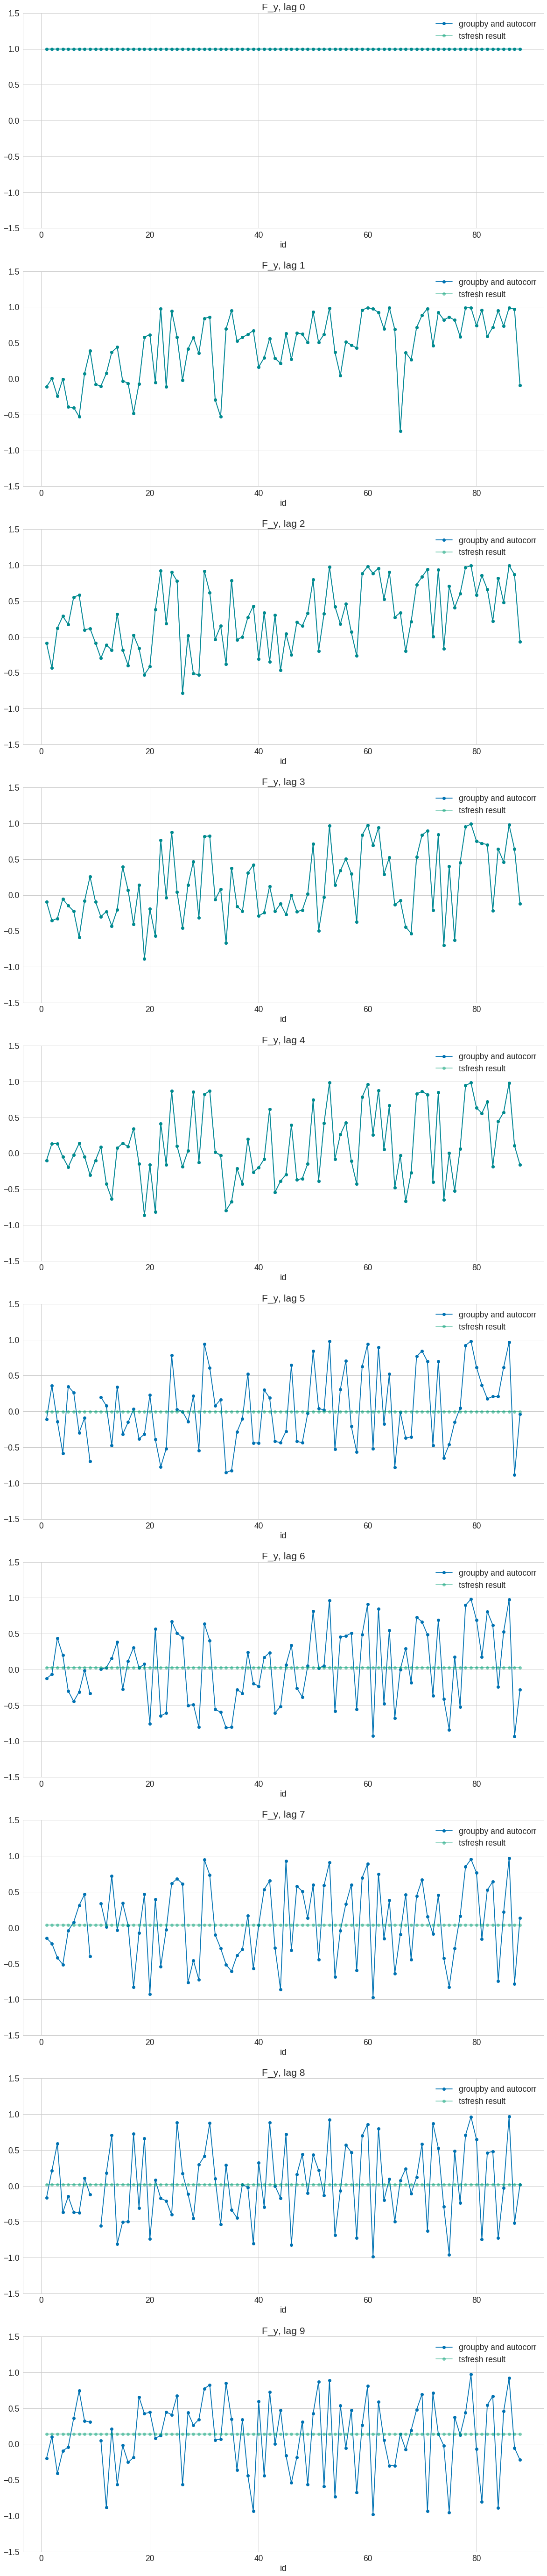

In [61]:
plt.figure(figsize=(20, nlags*10))
for lag in range(nlags):
    #autocorr_results = df[['time', 'id', colname]].groupby('id').apply(lambda x: pd.Series(x[colname]).autocorr(lag))
    plt.subplot(nlags,1,lag+1)
    plt.plot(autocorr_results[lag], 'o-')  # plot the groupby and autocorr result
    plt.plot(X['{}__autocorrelation__lag_{}'.format(colname, lag)], 'o-', alpha=0.5)  # plot the tsfresh result
    plt.legend(['groupby and autocorr', 'tsfresh result'])
    plt.title('{}, lag {}'.format(colname, lag))
    plt.ylim([-1.5, 1.5])
    plt.xlabel('id')
plt.show()

It seems that tsfresh fails to calculate the values for lags >= 5. The values for the lags 0-4 coincide.

Some values are outside the value range [-1, 1]. I don't know why. One could consider to treat this as an exception and catch it.

## Compare pd.Series.autocorr() with np.corrcoef

In [62]:
corrcoef_results = pd.DataFrame(columns=range(nlags))
for lag in range(nlags):
    ts_grouped_by_id = df[['time', 'id', colname]].groupby('id')
    corrcoef_series = ts_grouped_by_id.apply(lambda x: np.corrcoef(x[colname][:len(x)-lag], x[colname][lag:])[0,1])
    corrcoef_results[lag] = corrcoef_series

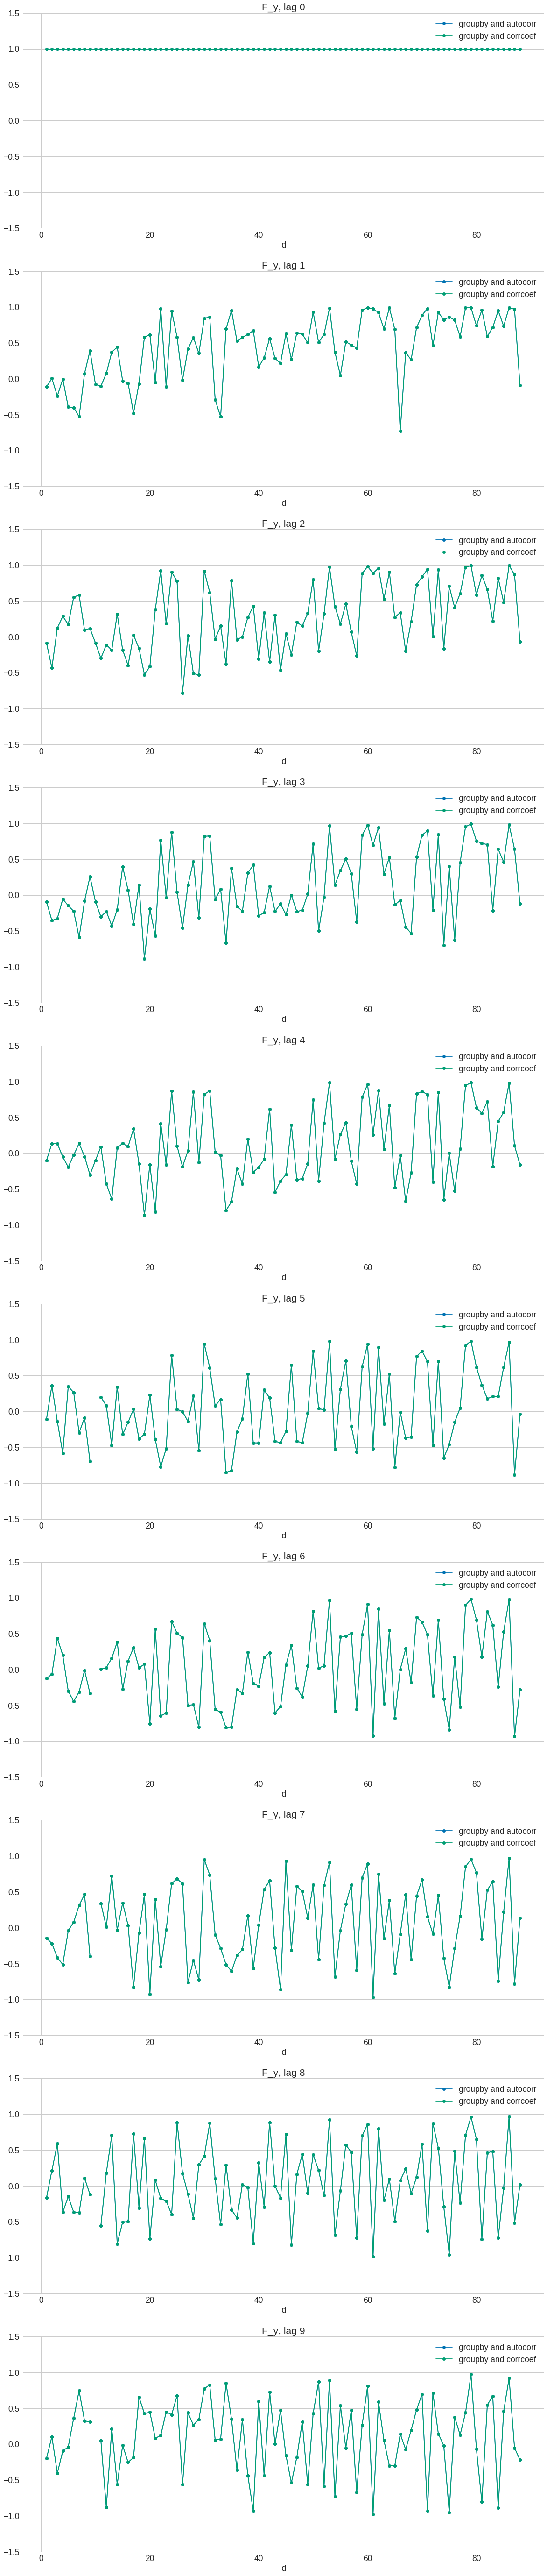

In [68]:
plt.figure(figsize=(20, nlags*10))
for lag in range(nlags):
    plt.subplot(nlags,1,lag+1)
    plt.plot(autocorr_results[lag], 'o-')  # plot the groupby and autocorr result
    plt.plot(corrcoef_results[lag], 'o-')  # plot the groupby and corrcoef result
    plt.legend(['groupby and autocorr', 'groupby and corrcoef'])
    plt.title('{}, lag {}'.format(colname, lag))
    plt.ylim([-1.5, 1.5])
    plt.xlabel('id')
plt.show()

This is how the the Pandas `autocorr` function works internally: By invoking `np.corrrcoef`.

## Compare acf to autocorr

In [73]:
# Save the acf values in a DataFrame
acf_results = pd.DataFrame(columns=range(nlags))
acf_series = df[['time', 'id', colname]].groupby('id').apply(lambda x: acf(pd.Series(x[colname]),
                                                                           nlags=nlags,
                                                                           unbiased=True))
for ts_id in acf_series.index:
    # print(pd.DataFrame(acf_series[ts_id]))
    acf_results = acf_results.append(pd.DataFrame(acf_series[ts_id], columns = [ts_id]).T)

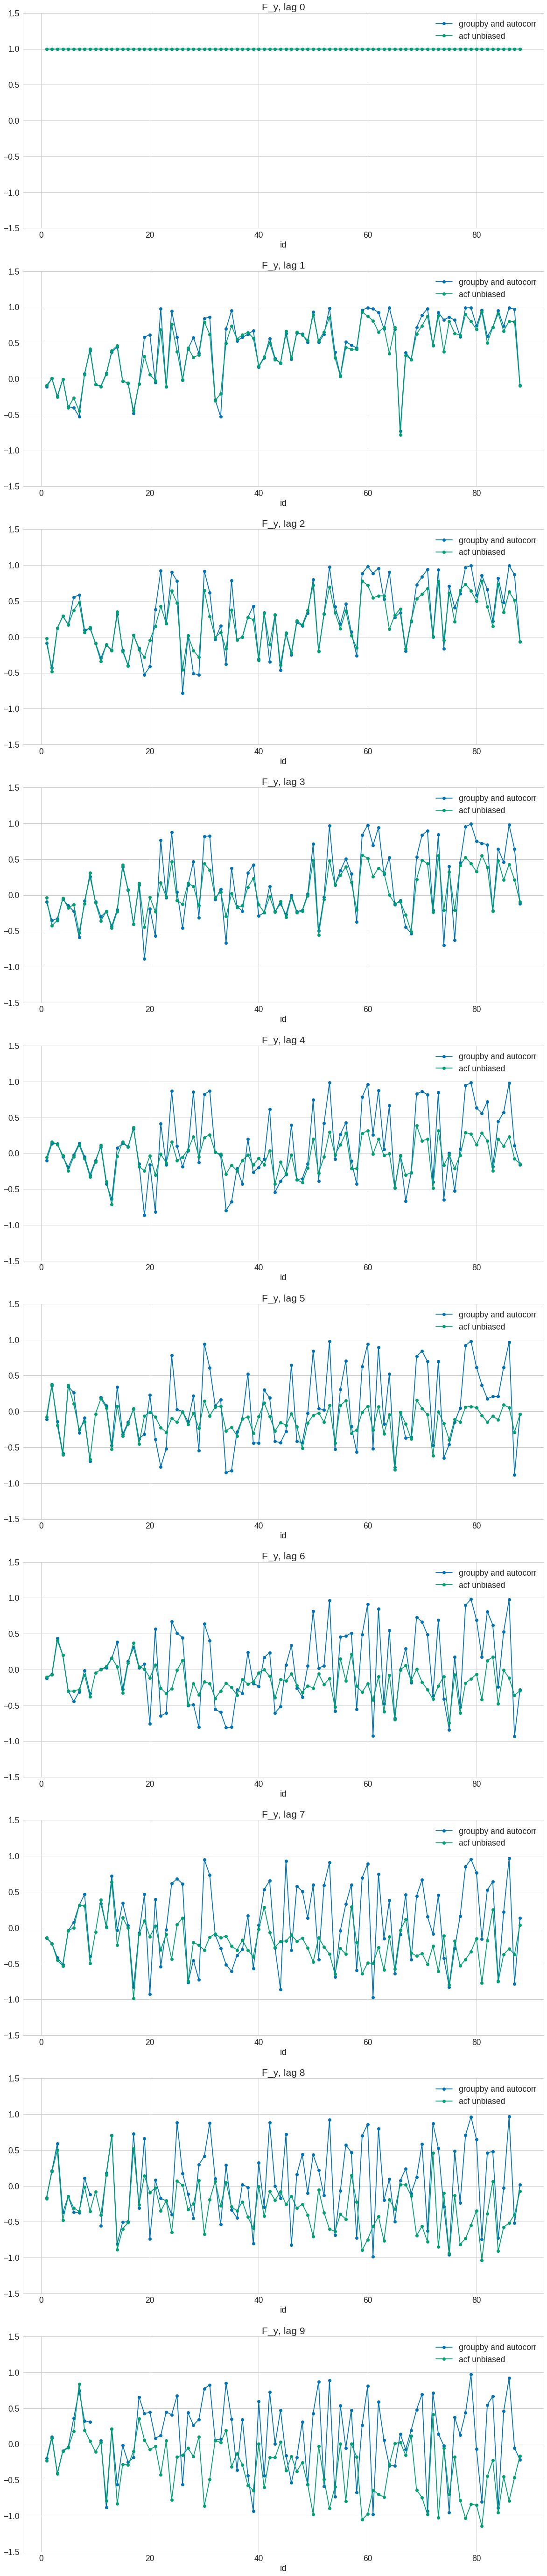

In [74]:
plt.figure(figsize=(20, nlags*10))
for lag in range(nlags):
    plt.subplot(nlags,1,lag+1)
    plt.plot(autocorr_results[lag], 'o-')  # plot the groupby and autocorr result
    plt.plot(acf_results[lag], 'o-')  # plot the groupby and corrcoef result
    plt.legend(['groupby and autocorr', 'acf unbiased'])
    plt.title('{}, lag {}'.format(colname, lag))
    plt.ylim([-1.5, 1.5])
    plt.xlabel('id')
plt.show()

The values are quite different. Obviously, they are correlated. The `autocorr()` function shows more values close to 1.

## Compare acf to pacf

In [76]:
# Save the pacf values in a DataFrame
pacf_results = pd.DataFrame(columns=range(nlags))
pacf_series = df[['time', 'id', colname]].groupby('id').apply(lambda x: pacf(pd.Series(x[colname]),
                                                                             nlags=nlags,
                                                                             method='ywunbiased'))
for ts_id in acf_series.index:
    # print(pd.DataFrame(acf_series[ts_id]))
    pacf_results = pacf_results.append(pd.DataFrame(pacf_series[ts_id], columns = [ts_id]).T)

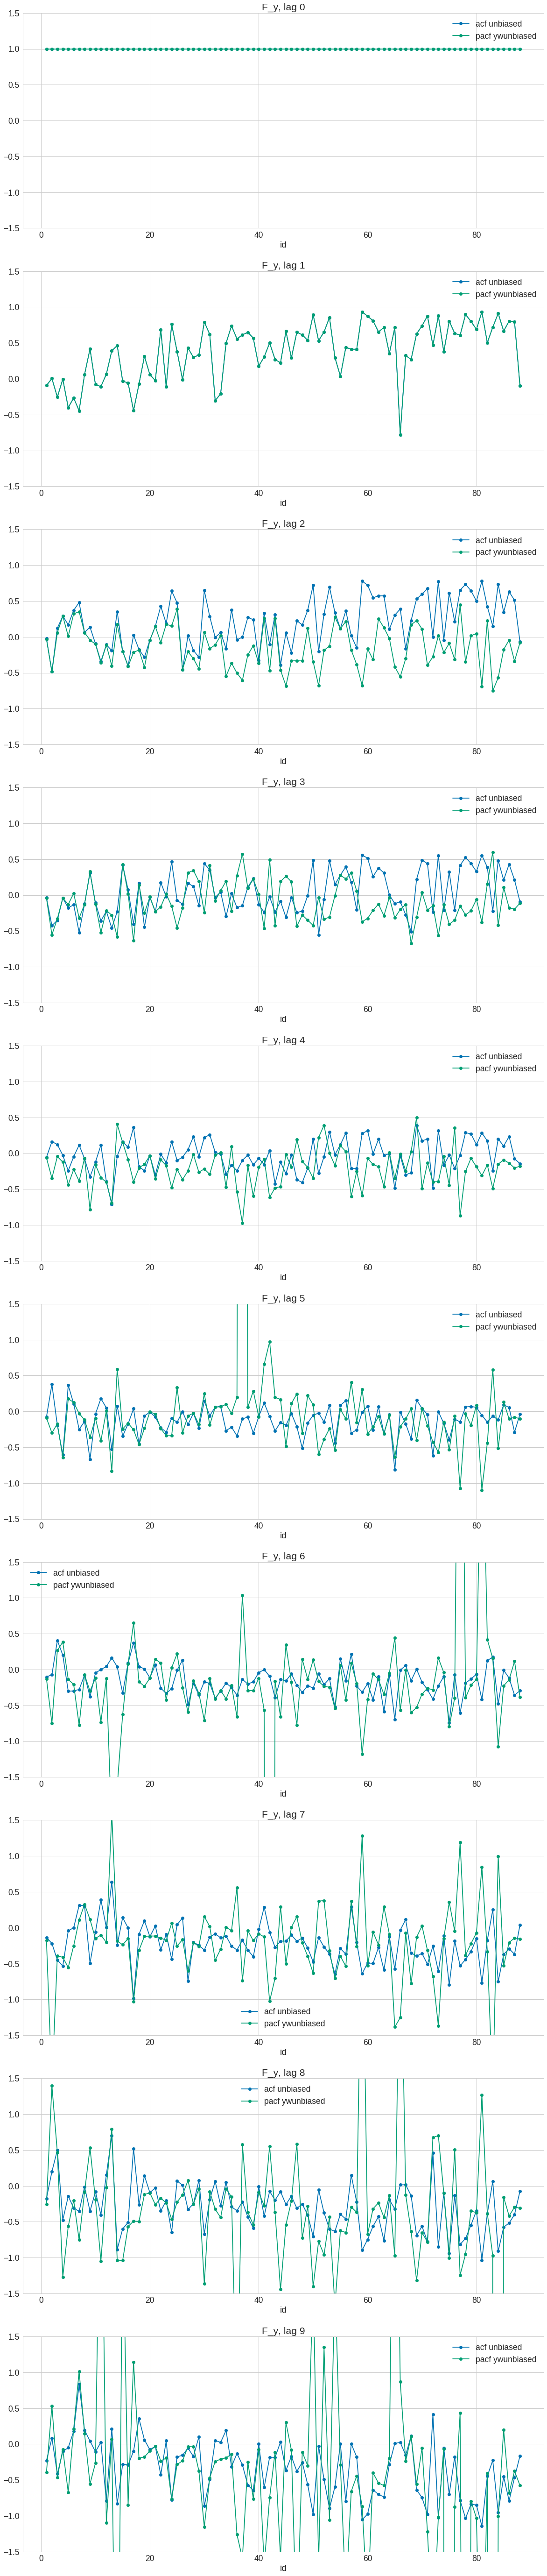

In [77]:
plt.figure(figsize=(20, nlags*10))
for lag in range(nlags):
    plt.subplot(nlags,1,lag+1)
    plt.plot(acf_results[lag], 'o-')  # plot the groupby and autocorr result
    plt.plot(pacf_results[lag], 'o-')  # plot the groupby and corrcoef result
    plt.legend(['acf unbiased', 'pacf ywunbiased'])
    plt.title('{}, lag {}'.format(colname, lag))
    plt.ylim([-1.5, 1.5])
    plt.xlabel('id')
plt.show()

The values for lag 1 are identical. For the lower lags, the series of PACF coefficients among time series are more strongly correlated. For higher lags, PACF yields values >1, which are outside the value range which is a little surprising.

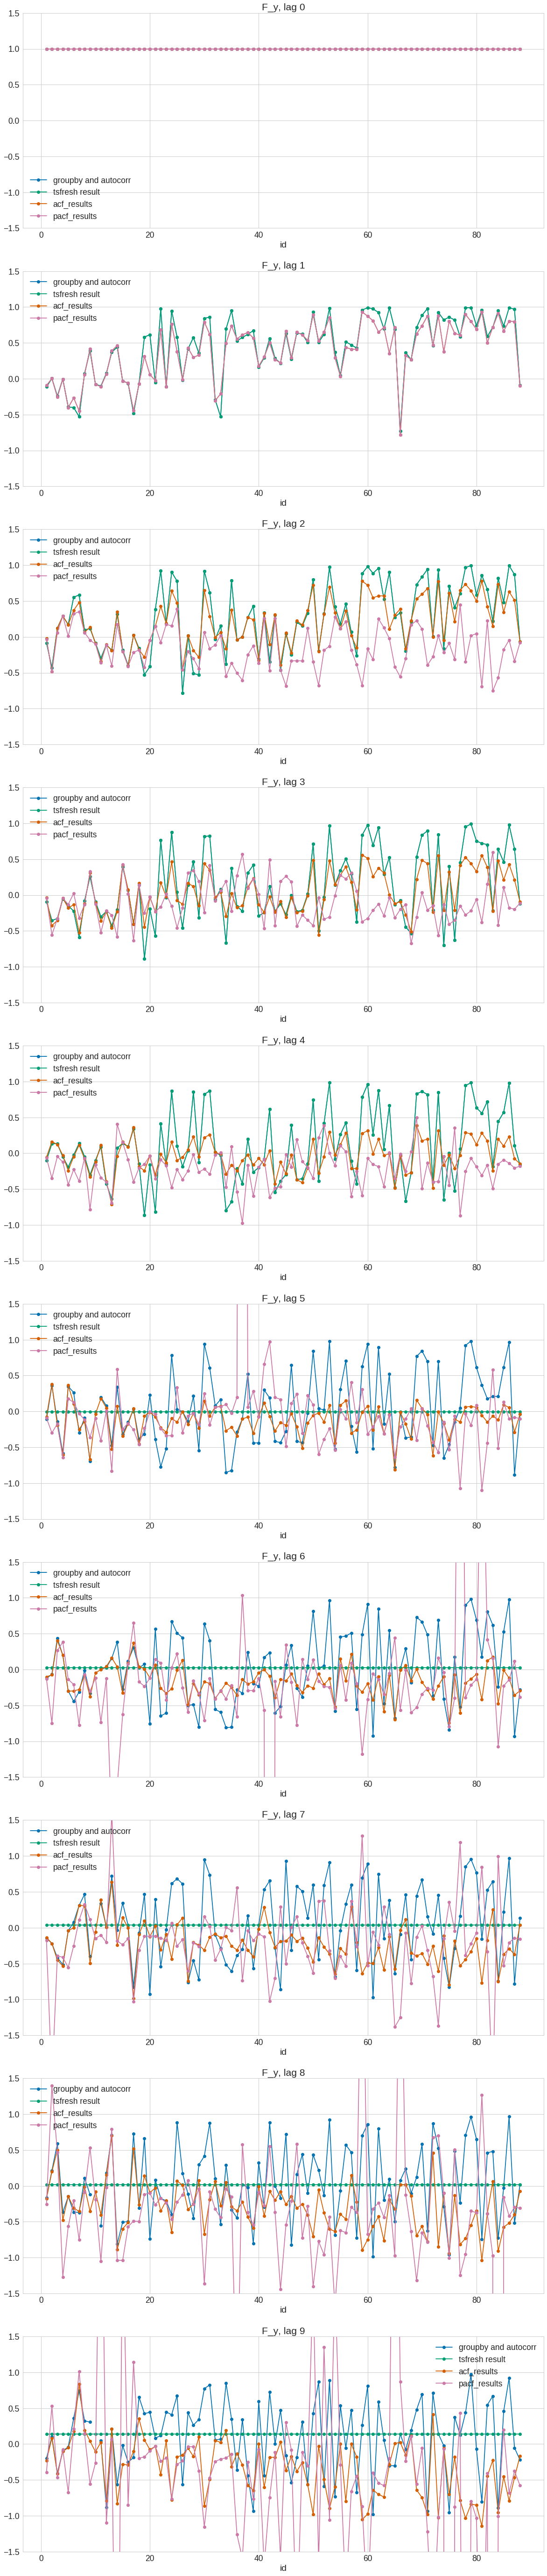

In [78]:
plt.figure(figsize=(20, nlags*10))
for lag in range(nlags):
    plt.subplot(nlags,1,lag+1)
    plt.plot(autocorr_results[lag], 'o-')  # plot the groupby and autocorr result
    plt.plot(X['{}__autocorrelation__lag_{}'.format(colname, lag)], 'o-')  # plot the tsfresh result
    plt.plot(acf_results[lag], 'o-')  # plot the acf result
    plt.plot(pacf_results[lag], 'o-')  # plot the pacf result
    plt.legend(['groupby and autocorr', 'tsfresh result', 'acf_results', 'pacf_results'])
    plt.title('{}, lag {}'.format(colname, lag))
    plt.ylim([-1.5, 1.5])
    plt.xlabel('id')
plt.show()

In [248]:
corrcoef_to_acf_results = pd.DataFrame(columns=range(nlags))
for lag in range(nlags):
    ts_grouped_by_id = df[['time', 'id', colname]].groupby('id')
    corrcoef_to_acf_series = ts_grouped_by_id.apply(lambda x: 
                                                    np.corrcoef(x[colname][:len(x)-lag], x[colname][lag:])[0,1] *
                                                    np.std(x[colname][:len(x[colname])-lag]) * 
                                                    np.std(x[colname][lag:]) /
                                                    np.var(x[colname]) *
                                                    len(x[colname]) /
                                                    (len(x[colname])-lag)
                                                    )
    corrcoef_to_acf_results[lag] = corrcoef_to_acf_series

In [229]:
autocorr_results

0         1         2         3             4         5         6  \
id                                                                        
1   1.0 -0.113228 -0.083333 -0.090909 -1.000000e-01 -0.111111 -0.125000   
2   1.0  0.003096 -0.430772 -0.354515  1.343589e-01  0.360356 -0.064364   
3   1.0 -0.241935  0.122841 -0.326860  1.337557e-01 -0.140471  0.438357   
4   1.0 -0.003654  0.288581 -0.053646 -5.166083e-02 -0.581685  0.199337   
5   1.0 -0.393669  0.173015 -0.148575 -1.927052e-01  0.347982 -0.298142   
6   1.0 -0.401478  0.554109 -0.224561 -2.526456e-02  0.263822 -0.444394   
7   1.0 -0.528995  0.583819 -0.591099  1.367753e-01 -0.296174 -0.311086   
8   1.0  0.072630  0.095884 -0.081559 -4.635174e-02 -0.090610 -0.010223   
9   1.0  0.391157  0.118568  0.257783 -3.025355e-01 -0.696801 -0.334623   
10  1.0 -0.076923 -0.083333 -0.090909 -1.000000e-01       NaN       NaN   
11  1.0 -0.102034 -0.297367 -0.301833  8.873244e-02  0.199853  0.003537   
12  1.0  0.074650 -0.109872 -0.228638 -4.267347e-01  0.077331  0.028868   
13  1.0  0.370709 -0.185364 -0.429864 -6.388120e-01 -0.472672  0.157751   
14  1.0  0.439943  0.317543 -0.203305  7.180734e-02  0.341485  0.385276   
15  1.0 -0.030372 -0.182451  0.393369  1.383942e-01 -0.319521 -0.276433   
16  1.0 -0.062500 -0.396907  0.069199  9.192771e-02 -0.151620  0.120096   
17  1.0 -0.481698  0.025965 -0.407325  3.410500e-01  0.031270  0.306200   
18  1.0 -0.068970 -0.158665  0.142467 -1.450563e-01 -0.382716  0.023033   
19  1.0  0.580973 -0.525787 -0.886215 -8.659676e-01 -0.316951  0.076399   
20  1.0  0.614551 -0.414566 -0.192676 -1.579627e-01  0.226797 -0.752055   
21  1.0 -0.050788  0.380352 -0.572382 -8.173870e-01 -0.390104  0.568971   
22  1.0  0.975856  0.925301  0.765989  4.153366e-01 -0.771734 -0.646997   
23  1.0 -0.112112  0.184662 -0.033914 -1.613557e-01 -0.518349 -0.606045   
24  1.0  0.946664  0.902618  0.879052  8.666758e-01  0.784927  0.671753   
25  1.0  0.580281  0.778152  0.041195  9.842396e-02  0.028950  0.507665   
26  1.0 -0.019485 -0.781322 -0.458130 -1.891211e-01 -0.002584  0.445263   
27  1.0  0.414504  0.018467  0.137683  3.436474e-02 -0.139900 -0.498070   
28  1.0  0.575200 -0.512057  0.469209  8.548890e-01  0.214427 -0.488956   
29  1.0  0.355530 -0.529019 -0.315839 -1.297657e-01 -0.543283 -0.801959   
30  1.0  0.842051  0.917282  0.818008  8.199612e-01  0.941024  0.641205   
..  ...       ...       ...       ...           ...       ...       ...   
59  1.0  0.956983  0.883628  0.836277  7.815974e-01  0.623383  0.489353   
60  1.0  0.991121  0.980540  0.974437  9.597550e-01  0.939886  0.909303   
61  1.0  0.973859  0.887304  0.693276  2.588350e-01 -0.518021 -0.926091   
62  1.0  0.924037  0.958794  0.941290  8.767282e-01  0.891750  0.846758   
63  1.0  0.696682  0.527864  0.292317  5.434251e-02 -0.175535 -0.475554   
64  1.0  0.987797  0.901040  0.525631  6.635573e-01  0.525016  0.544848   
65  1.0  0.687059  0.274394 -0.136225 -4.785993e-01 -0.780575 -0.677638   
66  1.0 -0.728768  0.339057 -0.074521 -2.845763e-02 -0.010011  0.001443   
67  1.0  0.365291 -0.199202 -0.443996 -6.681936e-01 -0.371311  0.290452   
68  1.0  0.264605  0.211864 -0.534584 -2.739983e-01 -0.355970 -0.184115   
69  1.0  0.713543  0.729006  0.530299  8.293387e-01  0.766634  0.729521   
70  1.0  0.884299  0.836294  0.835806  8.606235e-01  0.842731  0.666253   
71  1.0  0.979233  0.943042  0.896008  8.189486e-01  0.695283  0.485443   
72  1.0  0.460879  0.004488 -0.209414 -3.985267e-01 -0.472917 -0.365572   
73  1.0  0.924190  0.932972  0.844869  8.481427e-01  0.699436  0.690364   
74  1.0  0.821431 -0.163944 -0.702728 -6.497546e-01 -0.646885 -0.413156   
75  1.0  0.859000  0.705044  0.403637 -1.840881e-17 -0.461125 -0.836941   
76  1.0  0.817707  0.408451 -0.628722 -5.243595e-01 -0.151566  0.177418   
77  1.0  0.588430  0.603395  0.451475  6.175878e-02  0.047679 -0.522019   
78  1.0  0.987988  0.969155  0.952683  9.438895e-01  0.920850  0.897403   
79  1.0  0.990213  0.992865  0.

In [230]:
acf_results

0         1         2         3         4         5         6         7   \
1   1.0 -0.093407 -0.023669 -0.038462 -0.055944 -0.076923 -0.102564 -0.134615   
2   1.0  0.003434 -0.486317 -0.426683  0.161713  0.377404 -0.072115 -0.219351   
3   1.0 -0.256397  0.121556 -0.351679  0.121947 -0.194030  0.405473 -0.450793   
4   1.0 -0.005102  0.290350 -0.041574 -0.029018 -0.603237  0.201637 -0.533343   
5   1.0 -0.402289  0.169254 -0.180267 -0.243323  0.364243 -0.302671 -0.043027   
6   1.0 -0.267857  0.370879 -0.133929 -0.048701  0.107143 -0.297619  0.000000   
7   1.0 -0.446429  0.480769 -0.520833  0.113636 -0.250000 -0.277778  0.312500   
8   1.0  0.059390  0.063094 -0.122191 -0.076864 -0.140449 -0.077715  0.306180   
9   1.0  0.415816  0.135531  0.309524 -0.329004 -0.672619 -0.378307 -0.494048   
10  1.0 -0.081633 -0.093407 -0.107143 -0.123377 -0.035714 -0.047619 -0.062500   
11  1.0 -0.109108 -0.341340 -0.360385  0.112292  0.179161 -0.000459  0.390131   
12  1.0  0.063150 -0.108507 -0.225993 -0.391933  0.049669  0.043046  0.003725   
13  1.0  0.388712 -0.191277 -0.460565 -0.715909 -0.529018  0.163194  0.635045   
14  1.0  0.464041  0.351423 -0.229452 -0.040318  0.076199  0.038813 -0.239084   
15  1.0 -0.032696 -0.200433  0.422535  0.160051 -0.345070 -0.328638  0.140845   
16  1.0 -0.059336 -0.404906  0.072835  0.084467 -0.173228  0.089239 -0.003445   
17  1.0 -0.444856  0.025309 -0.404145  0.360104  0.037565  0.373057 -0.985427   
18  1.0 -0.073661 -0.176683  0.165365 -0.183239 -0.453125  0.041667 -0.091797   
19  1.0  0.312694 -0.283488 -0.445461 -0.246582 -0.064700  0.009459  0.097158   
20  1.0  0.056709 -0.044143 -0.030588 -0.035674 -0.008653 -0.115932 -0.123705   
21  1.0 -0.025099  0.147821 -0.232888 -0.302476 -0.077965  0.067106  0.023335   
22  1.0  0.685173  0.427710  0.175655 -0.013194 -0.227108 -0.258683 -0.308519   
23  1.0 -0.111607  0.186298 -0.022786 -0.131392 -0.289062 -0.334201 -0.092773   
24  1.0  0.759044  0.640683  0.463794  0.159803 -0.096151 -0.266031 -0.434865   
25  1.0  0.380540  0.475643 -0.074204 -0.099284 -0.151011 -0.009280  0.042272   
26  1.0 -0.013786 -0.456187 -0.126867 -0.054996 -0.004324  0.131857  0.137726   
27  1.0  0.429795  0.017707  0.164615  0.049153 -0.182548 -0.490721 -0.745450   
28  1.0  0.297211 -0.188390  0.120818  0.230914 -0.027856 -0.192077 -0.203581   
29  1.0  0.330614 -0.284331 -0.145523 -0.049624 -0.230344 -0.352090 -0.242918   
30  1.0  0.790668  0.648723  0.438855  0.219631  0.142953 -0.170891 -0.312518   
..  ...       ...       ...       ...       ...       ...       ...       ...   
59  1.0  0.931743  0.778582  0.558932  0.274841 -0.010571 -0.315363 -0.640856   
60  1.0  0.872391  0.721270  0.512993  0.314232  0.073034 -0.197017 -0.491794   
61  1.0  0.809135  0.545226  0.258120 -0.010230 -0.256570 -0.421057 -0.497227   
62  1.0  0.653736  0.572276  0.377623  0.195534  0.063812 -0.100255 -0.274762   
63  1.0  0.713952  0.572610  0.308411 -0.032498 -0.308411 -0.587227 -0.589661   
64  1.0  0.353453  0.106709  0.001883 -0.004794 -0.045738 -0.075573 -0.125780   
65  1.0  0.713074  0.303970 -0.119179 -0.488393 -0.815621 -0.693687 -0.574754   
66  1.0 -0.779831  0.389608 -0.092642 -0.034996 -0.010047 -0.007600 -0.033485   
67  1.0  0.322587 -0.167531 -0.274973 -0.304014 -0.173168  0.056933  0.113174   
68  1.0  0.269305  0.229210 -0.510135 -0.269042 -0.385135 -0.155405 -0.349662   
69  1.0  0.625178  0.529350  0.218828  0.387440  0.159601  0.004780 -0.394483   
70  1.0  0.737974  0.594584  0.487883  0.173933  0.042092 -0.174320 -0.358737   
71  1.0  0.875573  0.674881  0.437868  0.196505 -0.043281 -0.280545 -0.510209   
72  1.0  0.465962 -0.000278 -0.237365 -0.483098 -0.615523 -0.413357 -0.255415   
73  1.0  0.877041  0.772907  0.551187  0.312430 -0.002302 -0.226342 -0.607465   
74  1.0  0.374530 -0.047318 -0.210526 -0.168660 -0.166118 -0.097222 -0.113898   
75  1.0  0.803393  0.613759  0.322303 -0.023663 -0.395439 -0.739525 -0.795259   
76  1.0  0.633398  0.213103 -0.21076

In [406]:
acf_results.loc[1][1] / autocorr_results.loc[1][1]

0.82494469630534828

In [407]:
corrcoef_to_acf_results.loc[1][1]

-0.094612020632428767

In [408]:
series = ts_grouped_by_id.get_group(1)['F_y']

In [409]:
series

0    -1
1     0
2    -1
3    -1
4    -1
5    -1
6    -1
7    -1
8    -1
9    -1
10   -1
11   -1
12   -1
13   -1
14    0
Name: F_y, dtype: int64

In [410]:
lag = 1
x = series
x1 = x[:len(x)-lag]
x2 = x[lag:]
corrcoef = np.corrcoef(x1, x2, ddof=0)[0,1]
std1 = np.std(x[:len(x)-lag], ddof=0)
std2 = np.std(x[lag:], ddof=0)
varx = np.var(x)

/home/niklas/anaconda3/envs/py27tsfresh/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: bias and ddof have no effect and are deprecated


In [411]:
corrcoef * std1 * std2

-0.010204081632653059

In [412]:
cov = np.cov(x1, x2, ddof=0)  # needs to set ddof to 1 to get the same results!
cov

array([[ 0.06632653, -0.01020408],
       [-0.01020408,  0.12244898]])

In [413]:
np.correlate(x, x, 'full')[len(x):]*1.0 / np.arange(len(x)-1, 0, -1)

array([ 0.78571429,  0.84615385,  0.83333333,  0.81818182,  0.8       ,
        0.77777778,  0.75      ,  0.71428571,  0.66666667,  0.6       ,
        0.5       ,  0.33333333,  0.5       ,  0.        ])

In [414]:
np.arange(len(x), 1, -1)

array([15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2])

In [418]:
cov[0,1] / (varx * (len(x) - lag)) #/ (len(x)-lag)

-0.0063074680421619164

In [372]:
corrcoef

-0.11322770341445955

In [336]:
np.var(x2)

0.12244897959183675

In [375]:
corrcoef, std1, std2, varx

(-0.11322770341445955,
 0.25753937681885636,
 0.3499271061118826,
 0.11555555555555556)

In [297]:
std1 * std2

0.090120008840080063

In [262]:
x[:len(x)-lag].values

array([-1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [263]:
x[lag:].values

array([ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0])